In [ ]:
import pandas as pd
import random
import numpy as np
from itertools import combinations

def generate_realistic_healthcare_dataset():
    """Generate a more realistic healthcare dataset with overlapping symptoms and noise"""

    # Common symptoms that can appear across multiple diseases
    common_symptoms = [
        'fatigue', 'headache', 'fever', 'nausea', 'dizziness', 'weakness',
        'loss of appetite', 'difficulty sleeping', 'mood changes', 'anxiety'
    ]

    # Disease definitions with probability distributions for symptoms
    diseases = {
        'Common Cold': {
            'high_prob': ['runny nose', 'congestion', 'sneezing', 'sore throat', 'cough'],
            'medium_prob': ['mild fever', 'headache', 'fatigue', 'watery eyes'],
            'low_prob': ['body aches', 'loss of appetite', 'scratchy throat'],
            'rare_prob': ['nausea', 'dizziness']  # Sometimes co-occurring conditions
        },

        'Diabetes': {
            'high_prob': ['frequent urination', 'excessive thirst', 'increased hunger'],
            'medium_prob': ['unexplained weight loss', 'fatigue', 'blurred vision'],
            'low_prob': ['slow healing cuts', 'tingling extremities', 'dry skin', 'frequent infections'],
            'rare_prob': ['nausea', 'dizziness', 'headache']  # Complications or comorbidities
        },

        'Hypertension': {
            'high_prob': ['headaches', 'dizziness'],
            'medium_prob': ['chest pain', 'shortness of breath', 'fatigue'],
            'low_prob': ['nosebleeds', 'vision problems', 'irregular heartbeat'],
            'rare_prob': ['nausea', 'confusion', 'anxiety']
        },

        'Migraine': {
            'high_prob': ['severe headache', 'throbbing pain', 'sensitivity to light', 'nausea'],
            'medium_prob': ['sensitivity to sound', 'vomiting', 'dizziness'],
            'low_prob': ['visual disturbances', 'neck stiffness', 'fatigue'],
            'rare_prob': ['fever', 'confusion', 'mood changes']
        },

        'Gastroenteritis': {
            'high_prob': ['nausea', 'vomiting', 'diarrhea', 'stomach cramps'],
            'medium_prob': ['abdominal pain', 'fever', 'dehydration'],
            'low_prob': ['loss of appetite', 'bloating', 'weakness', 'headache'],
            'rare_prob': ['dizziness', 'muscle aches', 'fatigue']
        },

        'Pneumonia': {
            'high_prob': ['cough with phlegm', 'fever', 'difficulty breathing', 'chest pain'],
            'medium_prob': ['chills', 'sweating', 'fatigue'],
            'low_prob': ['rapid breathing', 'confusion', 'headache'],
            'rare_prob': ['nausea', 'dizziness', 'loss of appetite']
        },

        'Asthma': {
            'high_prob': ['wheezing', 'shortness of breath', 'chest tightness', 'coughing'],
            'medium_prob': ['difficulty sleeping', 'fatigue', 'rapid breathing'],
            'low_prob': ['anxiety', 'trouble speaking', 'dizziness'],
            'rare_prob': ['headache', 'nausea', 'mood changes']
        },

        'Arthritis': {
            'high_prob': ['joint pain', 'stiffness', 'swelling'],
            'medium_prob': ['reduced range of motion', 'morning stiffness', 'fatigue'],
            'low_prob': ['warmth around joints', 'muscle weakness', 'difficulty sleeping'],
            'rare_prob': ['headache', 'mood changes', 'loss of appetite']
        }
    }

    # Probability weights for each symptom category
    prob_weights = {
        'high_prob': 0.8,
        'medium_prob': 0.5,
        'low_prob': 0.2,
        'rare_prob': 0.05
    }

    def generate_symptom_list(disease_info):
        """Generate symptoms based on probability distributions"""
        symptoms = []

        for category, symptom_list in disease_info.items():
            prob = prob_weights[category]
            for symptom in symptom_list:
                if random.random() < prob:
                    symptoms.append(symptom)

        # Ensure at least 2 symptoms
        if len(symptoms) < 2:
            # Add some high probability symptoms
            missing_count = 2 - len(symptoms)
            available = [s for s in disease_info['high_prob'] if s not in symptoms]
            symptoms.extend(random.sample(available, min(missing_count, len(available))))

        # Randomly add some noise (symptoms from other conditions)
        if random.random() < 0.15:  # 15% chance of noise
            all_other_symptoms = []
            for other_disease, other_info in diseases.items():
                for cat in other_info.values():
                    all_other_symptoms.extend(cat)

            noise_symptoms = [s for s in all_other_symptoms if s not in symptoms]
            if noise_symptoms:
                symptoms.append(random.choice(noise_symptoms))

        return symptoms

    def create_natural_description(symptoms):
        """Create more natural, varied descriptions"""
        if not symptoms:
            return "Patient reports feeling unwell"

        # Shuffle symptoms
        symptoms = symptoms.copy()
        random.shuffle(symptoms)

        # Various natural language patterns
        patterns = [
            lambda s: f"Patient reports {', '.join(s[:-1])} and {s[-1]}" if len(s) > 1 else f"Patient reports {s[0]}",
            lambda s: f"Experiencing {', '.join(s[:2])} along with {', '.join(s[2:])}" if len(s) > 2 else f"Experiencing {' and '.join(s)}",
            lambda s: f"Symptoms include {', '.join(s)}",
            lambda s: f"Presenting with {s[0]}, {', '.join(s[1:])}" if len(s) > 1 else f"Presenting with {s[0]}",
            lambda s: f"Chief complaints are {' and '.join(s[:2])}" + (f" with additional {', '.join(s[2:])}" if len(s) > 2 else ""),
            lambda s: f"Patient describes {s[0]}" + (f" accompanied by {', '.join(s[1:])}" if len(s) > 1 else ""),
            lambda s: f"History of {', '.join(s[:3])}" + (f" and {', '.join(s[3:])}" if len(s) > 3 else ""),
        ]

        # Add temporal and severity modifiers randomly
        modifiers = {
            'temporal': ['recent', 'ongoing', 'intermittent', 'persistent', 'worsening', 'improving'],
            'severity': ['mild', 'moderate', 'severe', 'significant'],
            'duration': ['for several days', 'over the past week', 'for months', 'recently']
        }

        description = random.choice(patterns)(symptoms)

        # Add modifiers occasionally
        if random.random() < 0.3:
            mod_type = random.choice(list(modifiers.keys()))
            modifier = random.choice(modifiers[mod_type])
            if 'duration' in mod_type:
                description += f" {modifier}"
            else:
                description = description.replace(symptoms[0], f"{modifier} {symptoms[0]}", 1)

        return description

    # Generate confounding cases (patients with multiple conditions)
    def generate_confounding_case():
        """Generate cases that might represent multiple conditions"""
        primary_disease = random.choice(list(diseases.keys()))
        secondary_disease = random.choice([d for d in diseases.keys() if d != primary_disease])

        # Get symptoms from both conditions
        primary_symptoms = generate_symptom_list(diseases[primary_disease])
        secondary_symptoms = generate_symptom_list(diseases[secondary_disease])

        # Combine but limit total symptoms
        combined_symptoms = list(set(primary_symptoms + secondary_symptoms[:2]))

        return combined_symptoms, primary_disease  # Label with primary

    # Generate dataset
    dataset = []

    for disease_name, disease_info in diseases.items():
        print(f"Generating {disease_name} samples...")

        # Generate 170 typical cases
        for i in range(170):
            symptoms = generate_symptom_list(disease_info)
            description = create_natural_description(symptoms)

            dataset.append({
                'symptoms': description,
                'disease': disease_name,
                'sample_id': f"{disease_name.lower().replace(' ', '_')}_{i+1:03d}",
                'case_type': 'typical'
            })

        # Generate 30 confounding/complex cases
        for i in range(30):
            symptoms, label = generate_confounding_case()
            # Bias towards the current disease for these cases
            if random.random() < 0.7:
                label = disease_name
                # Add some symptoms from current disease
                current_symptoms = generate_symptom_list(disease_info)
                symptoms = list(set(symptoms + current_symptoms[:2]))

            description = create_natural_description(symptoms)

            dataset.append({
                'symptoms': description,
                'disease': label,
                'sample_id': f"{disease_name.lower().replace(' ', '_')}_complex_{i+1:03d}",
                'case_type': 'complex'
            })

    # Convert to DataFrame and shuffle
    df = pd.DataFrame(dataset)
    df = df.sample(frac=1, random_state=42).reset_index(drop=True)

    # Add some completely ambiguous cases
    ambiguous_cases = []
    for i in range(50):
        # Create cases with very common symptoms that could be anything
        ambiguous_symptoms = random.sample(common_symptoms, random.randint(2, 4))
        description = create_natural_description(ambiguous_symptoms)
        disease_label = random.choice(list(diseases.keys()))  # Random label for ambiguous cases

        ambiguous_cases.append({
            'symptoms': description,
            'disease': disease_label,
            'sample_id': f"ambiguous_{i+1:03d}",
            'case_type': 'ambiguous'
        })

    ambiguous_df = pd.DataFrame(ambiguous_cases)
    df = pd.concat([df, ambiguous_df], ignore_index=True)
    df = df.sample(frac=1, random_state=123).reset_index(drop=True)

    # Save to CSV
    df.to_csv('realistic_healthcare_dataset.csv', index=False)

    print(f"\nRealistic dataset generated!")
    print(f"Total samples: {len(df)}")
    print(f"Case types: {df['case_type'].value_counts()}")
    print(f"Diseases: {df['disease'].value_counts().sort_index()}")

    # Analyze symptom overlap
    print(f"\nSample descriptions by disease:")
    for disease in sorted(df['disease'].unique()):
        samples = df[df['disease'] == disease]['symptoms'].head(2)
        print(f"\n{disease}:")
        for desc in samples:
            print(f"  - {desc}")

    return df

# Generate the realistic dataset
if __name__ == "__main__":
    df = generate_realistic_healthcare_dataset()

Generating Common Cold samples...
Generating Diabetes samples...
Generating Hypertension samples...
Generating Migraine samples...
Generating Gastroenteritis samples...
Generating Pneumonia samples...
Generating Asthma samples...
Generating Arthritis samples...

Realistic dataset generated!
Total samples: 1650
Case types: case_type
typical      1360
complex       240
ambiguous      50
Name: count, dtype: int64
Diseases: disease
Arthritis          209
Asthma             200
Common Cold        213
Diabetes           200
Gastroenteritis    206
Hypertension       210
Migraine           201
Pneumonia          211
Name: count, dtype: int64

Sample descriptions by disease:

Arthritis:
  - History of difficulty sleeping, morning stiffness, muscle weakness and swelling, reduced range of motion, joint pain
  - Patient reports swelling, warmth around joints, joint pain and fatigue

Asthma:
  - Presenting with trouble speaking, shortness of breath, coughing, chest tightness, wheezing
  - Experienc

In [ ]:
import pandas as pd
import random
import numpy as np
from itertools import combinations

In [ ]:
df = pd.read_csv('realistic_healthcare_dataset.csv')

# Drop the sample_id column
df = df.drop('sample_id', axis=1)
# Save back to CSV
df.to_csv('realistic1_healthcare_dataset.csv', index=False)

print("✅ sample_id column removed!")
print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

✅ sample_id column removed!
Dataset shape: (1650, 3)
Columns: ['symptoms', 'disease', 'case_type']


In [ ]:
!pip install transformers datasets torch torchvision torchaudio
!pip install scikit-learn pandas numpy matplotlib seaborn
!pip install accelerate  # For faster training

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 88.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer,
    EarlyStoppingCallback
)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
class HealthcareDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=512):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }


In [ ]:
def load_and_preprocess_data(csv_path):
    """
    Load your healthcare dataset
    Expected format: CSV with columns 'symptoms' and 'disease'
    """
    df = pd.read_csv(csv_path)

    # Clean text data
    df['symptoms'] = df['symptoms'].str.lower().str.strip()
    df['disease'] = df['disease'].str.strip()

    # Create label mapping
    unique_diseases = df['disease'].unique()
    label2id = {disease: idx for idx, disease in enumerate(unique_diseases)}
    id2label = {idx: disease for disease, idx in label2id.items()}

    # Convert labels to integers
    df['labels'] = df['disease'].map(label2id)

    print(f"Dataset loaded: {len(df)} samples")
    print(f"Number of unique diseases: {len(unique_diseases)}")
    print(f"Diseases: {list(unique_diseases)}")

    return df, label2id, id2label


In [ ]:
def initialize_model_and_tokenizer(model_name, num_labels):
    """
    Initialize pre-trained model and tokenizer
    Recommended models:
    - 'distilbert-base-uncased' (lightweight)
    - 'bert-base-uncased' (standard)
    - 'emilyalsentzer/Bio_ClinicalBERT' (healthcare-specific)
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_labels,
        problem_type="single_label_classification"
    )

    return model, tokenizer

In [ ]:
def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return {
        'accuracy': accuracy_score(labels, predictions),
    }

In [ ]:
def train_model(model, train_dataset, val_dataset, output_dir="./healthcare_model"):
    """
    Configure and start training
    """
    training_args = TrainingArguments(
        output_dir=output_dir,
        num_train_epochs=10,              # Start with 3, adjust based on performance
        per_device_train_batch_size=8,   # Reduce if GPU memory issues
        per_device_eval_batch_size=8,
        warmup_steps=500,
        weight_decay=0.01,
        logging_dir='./logs',
        logging_steps=100,
        eval_strategy="steps",           # Changed from evaluation_strategy
        eval_steps=500,
        save_strategy="steps",
        save_steps=500,
        load_best_model_at_end=True,
        metric_for_best_model="accuracy",
        greater_is_better=True,
        report_to=None,  # Disable wandb logging
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        compute_metrics=compute_metrics,
        callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
    )

    # Start training
    print("Starting training...")
    trainer.train()

    return trainer

In [ ]:
def evaluate_model(trainer, test_dataset, id2label):
    """
    Evaluate the trained model
    """
    # Get predictions
    predictions = trainer.predict(test_dataset)
    y_pred = np.argmax(predictions.predictions, axis=1)
    y_true = predictions.label_ids

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    report = classification_report(
        y_true, y_pred,
        target_names=[id2label[i] for i in range(len(id2label))],
        output_dict=True
    )

    print(f"Test Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred,
                              target_names=[id2label[i] for i in range(len(id2label))]))

    # Confusion Matrix
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d',
                xticklabels=[id2label[i] for i in range(len(id2label))],
                yticklabels=[id2label[i] for i in range(len(id2label))])
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    return accuracy, report

In [ ]:
def predict_disease(text, model, tokenizer, id2label, device='cpu'):
    """
    Predict disease for new symptom description
    """
    model.eval()

    # Tokenize input
    encoding = tokenizer(
        text,
        truncation=True,
        padding='max_length',
        max_length=512,
        return_tensors='pt'
    ).to(device)

    # Get prediction
    with torch.no_grad():
        outputs = model(**encoding)
        predictions = torch.nn.functional.softmax(outputs.logits, dim=-1)
        predicted_class = torch.argmax(predictions, dim=-1).item()
        confidence = predictions[0][predicted_class].item()

    predicted_disease = id2label[predicted_class]

    return predicted_disease, confidence

Using device: cuda
Dataset loaded: 1650 samples
Number of unique diseases: 8
Diseases: ['Asthma', 'Diabetes', 'Arthritis', 'Common Cold', 'Pneumonia', 'Gastroenteritis', 'Migraine', 'Hypertension']
Train: 1155, Val: 247, Test: 248


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Starting training...


Step,Training Loss,Validation Loss,Accuracy
500,0.366000,0.354575,0.914980
1000,0.105400,0.473550,0.906883


Test Accuracy: 0.8952

Classification Report:
                 precision    recall  f1-score   support

         Asthma       0.91      0.97      0.94        30
       Diabetes       0.96      0.90      0.93        30
      Arthritis       0.88      0.88      0.88        32
    Common Cold       0.90      0.84      0.87        32
      Pneumonia       0.80      0.90      0.85        31
Gastroenteritis       0.97      0.90      0.93        31
       Migraine       0.83      1.00      0.91        30
   Hypertension       0.96      0.78      0.86        32

       accuracy                           0.90       248
      macro avg       0.90      0.90      0.90       248
   weighted avg       0.90      0.90      0.90       248



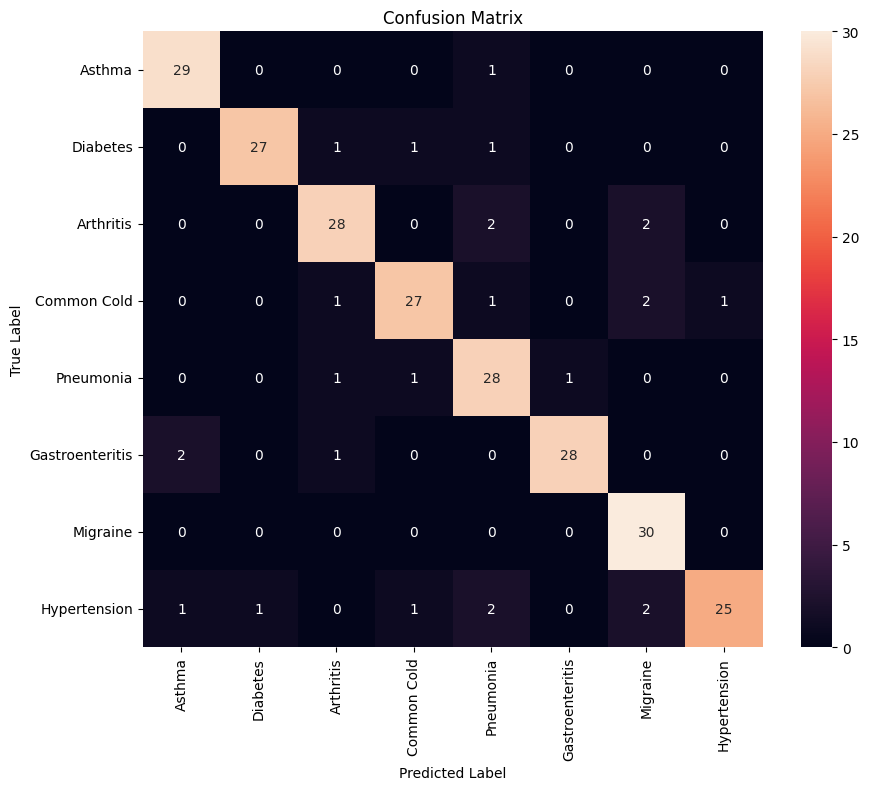


Sample Prediction:
Symptoms: Patient has fever, cough, and difficulty breathing
Predicted Disease: Pneumonia
Confidence: 0.9843


In [ ]:
def main():
    # Configuration
    MODEL_NAME = "distilbert-base-uncased"  # Change to your preferred model
    CSV_PATH = "realistic1_healthcare_dataset.csv"     # Path to your dataset
    MAX_LENGTH = 512

    # Check for GPU
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Using device: {device}")

    # Step 1: Load data
    df, label2id, id2label = load_and_preprocess_data(CSV_PATH)

    # Step 2: Split data
    train_texts, temp_texts, train_labels, temp_labels = train_test_split(
        df['symptoms'].values, df['labels'].values,
        test_size=0.3, random_state=42, stratify=df['labels']
    )

    val_texts, test_texts, val_labels, test_labels = train_test_split(
        temp_texts, temp_labels,
        test_size=0.5, random_state=42, stratify=temp_labels
    )

    print(f"Train: {len(train_texts)}, Val: {len(val_texts)}, Test: {len(test_texts)}")

    # Step 3: Initialize model
    model, tokenizer = initialize_model_and_tokenizer(MODEL_NAME, len(label2id))
    model.to(device)

    # Step 4: Create datasets
    train_dataset = HealthcareDataset(train_texts, train_labels, tokenizer, MAX_LENGTH)
    val_dataset = HealthcareDataset(val_texts, val_labels, tokenizer, MAX_LENGTH)
    test_dataset = HealthcareDataset(test_texts, test_labels, tokenizer, MAX_LENGTH)

    # Step 5: Train model
    trainer = train_model(model, train_dataset, val_dataset)

    # Step 6: Evaluate
    accuracy, report = evaluate_model(trainer, test_dataset, id2label)

    # Step 7: Save model
    trainer.save_model("./final_healthcare_model")
    tokenizer.save_pretrained("./final_healthcare_model")

    # Step 8: Test inference
    sample_symptoms = "Patient has fever, cough, and difficulty breathing"
    predicted_disease, confidence = predict_disease(
        sample_symptoms, model, tokenizer, id2label, device
    )

    print(f"\nSample Prediction:")
    print(f"Symptoms: {sample_symptoms}")
    print(f"Predicted Disease: {predicted_disease}")
    print(f"Confidence: {confidence:.4f}")

if __name__ == "__main__":
    main()

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import json

model = AutoModelForSequenceClassification.from_pretrained("./final_healthcare_model")
tokenizer = AutoTokenizer.from_pretrained("./final_healthcare_model")
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

id2label = {0: 'Asthma', 1: 'Diabetes', 2: 'Arthritis', 3: 'Common Cold', 4: 'Pneumonia', 5: 'Gastroenteritis', 6: 'Migraine', 7: 'Hypertension'}

test_prompt = "Experiencing excessive thirst, fatigue along with blurred vision, frequent urination, unexplained weight loss, tingling extremities, increased hunger for several days"

predicted_disease, confidence = predict_disease(
    test_prompt, model, tokenizer, id2label, device
)

print(f"Symptoms: {test_prompt}")
print(f"Predicted Disease: {predicted_disease}")
print(f"Confidence: {confidence:.4f}")

Symptoms: Experiencing excessive thirst, fatigue along with blurred vision, frequent urination, unexplained weight loss, tingling extremities, increased hunger for several days
Predicted Disease: Diabetes
Confidence: 0.9799


In [ ]:
# In Colab, run this to zip your model:
!zip -r final_healthcare_model.zip final_healthcare_model/

# Then download the zip file
from google.colab import files
files.download('final_healthcare_model.zip')

  adding: final_healthcare_model/ (stored 0%)
  adding: final_healthcare_model/special_tokens_map.json (deflated 42%)
  adding: final_healthcare_model/tokenizer_config.json (deflated 75%)
  adding: final_healthcare_model/vocab.txt (deflated 53%)
  adding: final_healthcare_model/config.json (deflated 54%)
  adding: final_healthcare_model/tokenizer.json (deflated 71%)
  adding: final_healthcare_model/model.safetensors (deflated 8%)
  adding: final_healthcare_model/training_args.bin (deflated 51%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>